PROBLEM STATEMENT
Your client is a retail banking institution. Term deposits are a major source
of income for a bank
A term deposit is a cash investment held at a financial institution. Yo r
money is invested for an agreed rate of interest over a fixed amount of
time, or trm.
The bank has various outreach plans to sell term deposits to  heir
customers such as email marketing, advertisements, telephonic mar eting
and digital marketing.
Telephonic marketing campaigns still remain one of the most effec ive way
to reach out to people. However, they require huge investment as l rge call
centers are hired to actually execute these campaigns. Hence, it  s crucial
to identify the customers most likely to convert beforehand so th t they can
be specifically target d via call.
You are provided with the client data such as : age of the clie t, their job
type, their marital status, etc. Along with the client data  you are also
provided with the information of the call such as the duration oand month of the call, etc. Given this information, your task is to predict if
the client will subscribe to term deposit.f the call, day

In [ ]:
#importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [ ]:
#export data
file = pd.read_csv("train.csv")

basic details of given data

In [ ]:
file.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [ ]:
file.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [ ]:
file.shape

(31647, 18)

In [ ]:
file.dtypes

,0
ID,int64
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object


In [ ]:
file.isnull().sum()       #no missing values

,0
ID,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


Univarient analysis of target variable

In [ ]:
file['subscribed'].value_counts()

,count
subscribed,
no,27932
yes,3715


In [ ]:
file['subscribed'].value_counts()/len(file['subscribed'])

,count
subscribed,
no,0.882611
yes,0.117389


<Axes: xlabel='subscribed'>

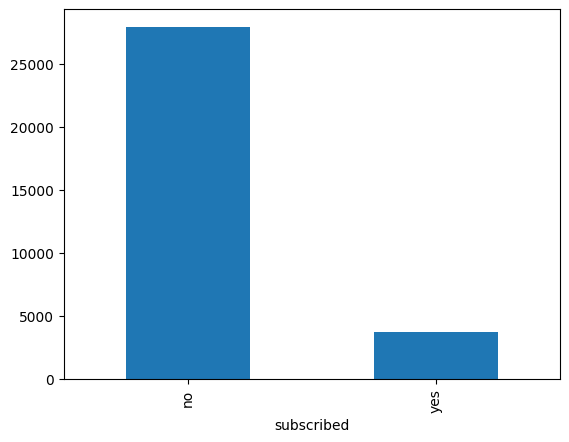

In [ ]:
file['subscribed'].value_counts().plot.bar()

Univarient analysis of variable that may effect target variable (Graphical)

In [ ]:
file['age'].describe()

,age
count,31647.000000
mean,40.957247
std,10.625134
min,18.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,95.000000


In [ ]:
file.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [ ]:
#!pip install seaborn

<Axes: xlabel='job'>

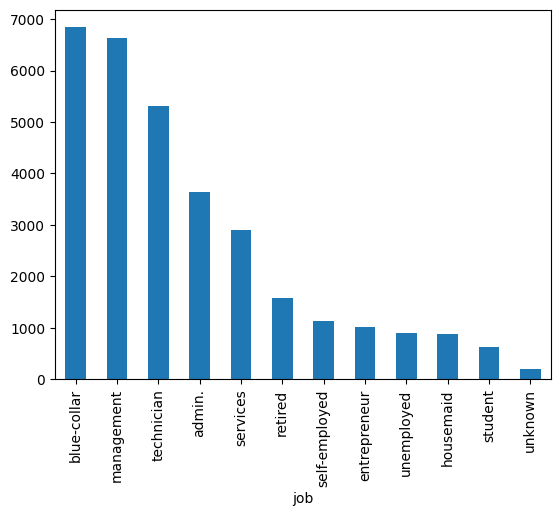

In [ ]:
file['job'].value_counts().plot.bar()

<Axes: xlabel='default'>

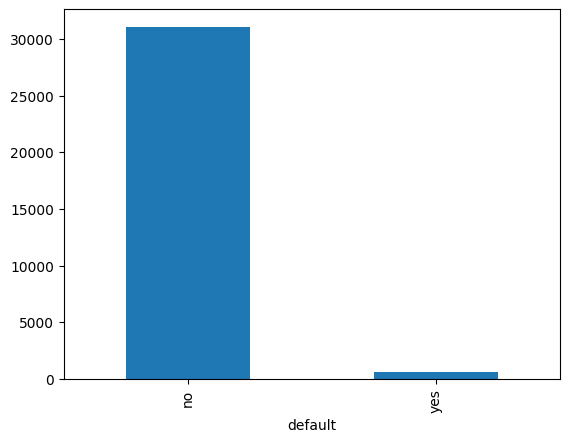

In [ ]:
file['default'].value_counts().plot.bar()

Bivarient analysis of age, job and default with target variable

In [ ]:
file.groupby('subscribed')['age'].mean()   #no major difference

,age
subscribed,
no,40.862165
yes,41.672140


In [ ]:
pd.crosstab(file['job'], file['subscribed'])

subscribed,no,yes
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


<Axes: xlabel='job'>

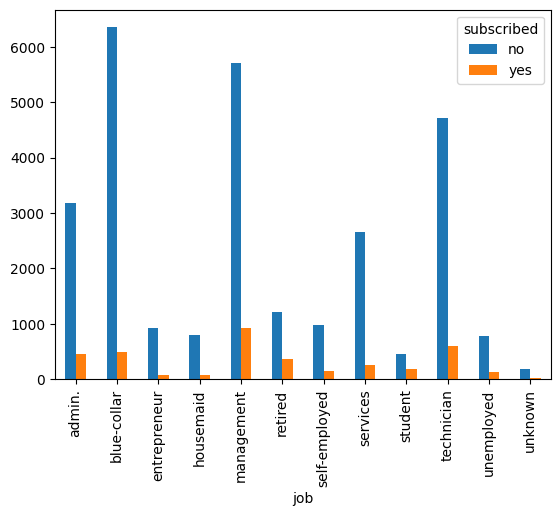

In [ ]:
pd.crosstab(file['job'], file['subscribed']).plot.bar()

In [ ]:
pd.crosstab(file['default'], file['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


<Axes: xlabel='default'>

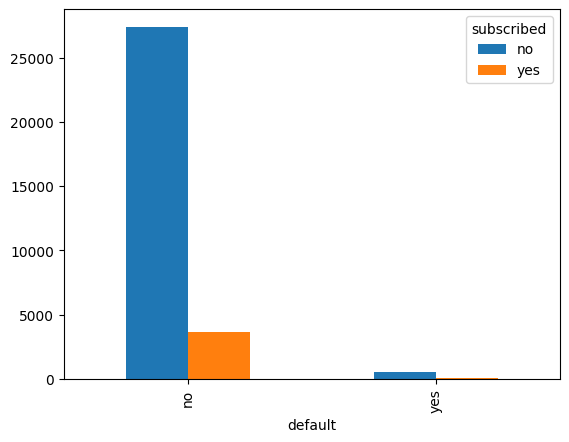

In [ ]:
pd.crosstab(file['default'], file['subscribed']).plot.bar()   #people having no default subscribe more as compared to people having default

In [ ]:
file_encoding = pd.get_dummies(file, dtype = int, drop_first=True)

In [ ]:
file_encoding.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,subscribed_yes
0,26110,56,1933,19,44,2,-1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,1,0,1
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Modeling

In [ ]:
#seperating dependent and independent variable

x= file_encoding.drop(['subscribed_yes'], axis=1)             #train/independent
y= file_encoding['subscribed_yes']                           #target/dependent

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,
                                   random_state=23,
                                   test_size=0.25,
                                   shuffle=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
print(model)

LogisticRegression()


In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8890293225480284

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_train, y_pred_train)

0.8877606909627133

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
test = pd.read_csv(r'test.csv')

In [ ]:
test = pd.get_dummies(test, drop_first=True)

In [ ]:
result = pd.DataFrame()

In [ ]:
ext_pred= model.predict(test)
print(ext_pred)

[0 0 0 ... 0 0 0]


In [ ]:
result['result'] = ext_pred

In [ ]:
result['result'] = result['result'].replace(0,'no')
result['result'] = result['result'].replace(1,'yes')

In [ ]:
result.to_csv('finalresult.csv')